In [1]:
from tau_profile_parser import TauProfileParser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
path_to_ExampleData = '/home/users/MTrappett/tau2/examples/jupyter_notebooks/ExampleData'

In [3]:
orig = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/orig',MULTI=True)
nc_static = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/nocall_static',MULTI=True)
nocall = TauProfileParser.parse(path_to_ExampleData+'/theta_64_flash/nocall',MULTI=True)

In [4]:
orig_df = orig.interval_data()
nc_static_df = nc_static.interval_data()
nocall_df = nocall.interval_data()

In [5]:
# number of nodes, 1 based indexing
nodes_num = 10

# for exclusive, time
orig_time = pd.DataFrame()
nc_static_time = pd.DataFrame()
nocall_time = pd.DataFrame()
for node in range(nodes_num):
    orig_time = orig_time.append(orig_df.loc[(node,0,0),('Exclusive','TIME')].T)
    nc_static_time = nc_static_time.append(nc_static_df.loc[(node,0,0),('Exclusive','TIME')].T)
    nocall_time = nocall_time.append(nocall_df.loc[(node,0,0),('Exclusive','TIME')].T)  

In [6]:
# sort the timers by Exclusive, TIME
orig_sums = orig_time.sum()
orig_sums.sort_values(ascending=False, inplace=True)

# drop the MPI TIMERS
for timer in orig_sums.index:
    if 'MPI' in timer:
#         print(timer)
        orig_sums.drop(labels=timer, inplace=True)
    
# the top timers
orig_top = orig_sums.head(8)
top_timers = [timer for timer in orig_top.index]

In [7]:
# normalize: top_diff = ((top_diff - top_diff.min())/(top_diff.max() - top_diff.min()))

orig_time_norm = ((orig_time - orig_time.min())/(orig_time.max() - orig_time.min()))
orig_time_norm['Node'] = orig_time_norm.index
orig_time_norm['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_time_norm = ((nc_static_time - nc_static_time.min())/(nc_static_time.max() - nc_static_time.min()))
nc_static_time_norm['Node'] = nc_static_time_norm.index
nc_static_time_norm['Method'] = ['Static' for i in range(nodes_num)]

nocall_time_norm = ((nocall_time - nocall_time.min())/(nocall_time.max() - nocall_time.min()))
nocall_time_norm['Node'] = nocall_time_norm.index
nocall_time_norm['Method'] = ['NoCall' for i in range(nodes_num)]


In [8]:
orig_time['Node'] = orig_time.index
orig_time['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_time['Node'] = nc_static_time.index
nc_static_time['Method'] = ['Static' for i in range(nodes_num)]

nocall_time['Node'] = nocall_time.index
nocall_time['Method'] = ['NoCall' for i in range(nodes_num)]

In [9]:
orig_time.reset_index(drop=True, inplace=True)
nc_static_time.reset_index(drop=True, inplace=True)
nocall_time.reset_index(drop=True, inplace=True)

In [10]:
non_normal_df = pd.concat([orig_time, nc_static_time, nocall_time])
normal_df = pd.concat([orig_time_norm, nc_static_time_norm, nocall_time_norm])

##### Box Plot with plotly: 
https://plotly.com/python/box-plots/

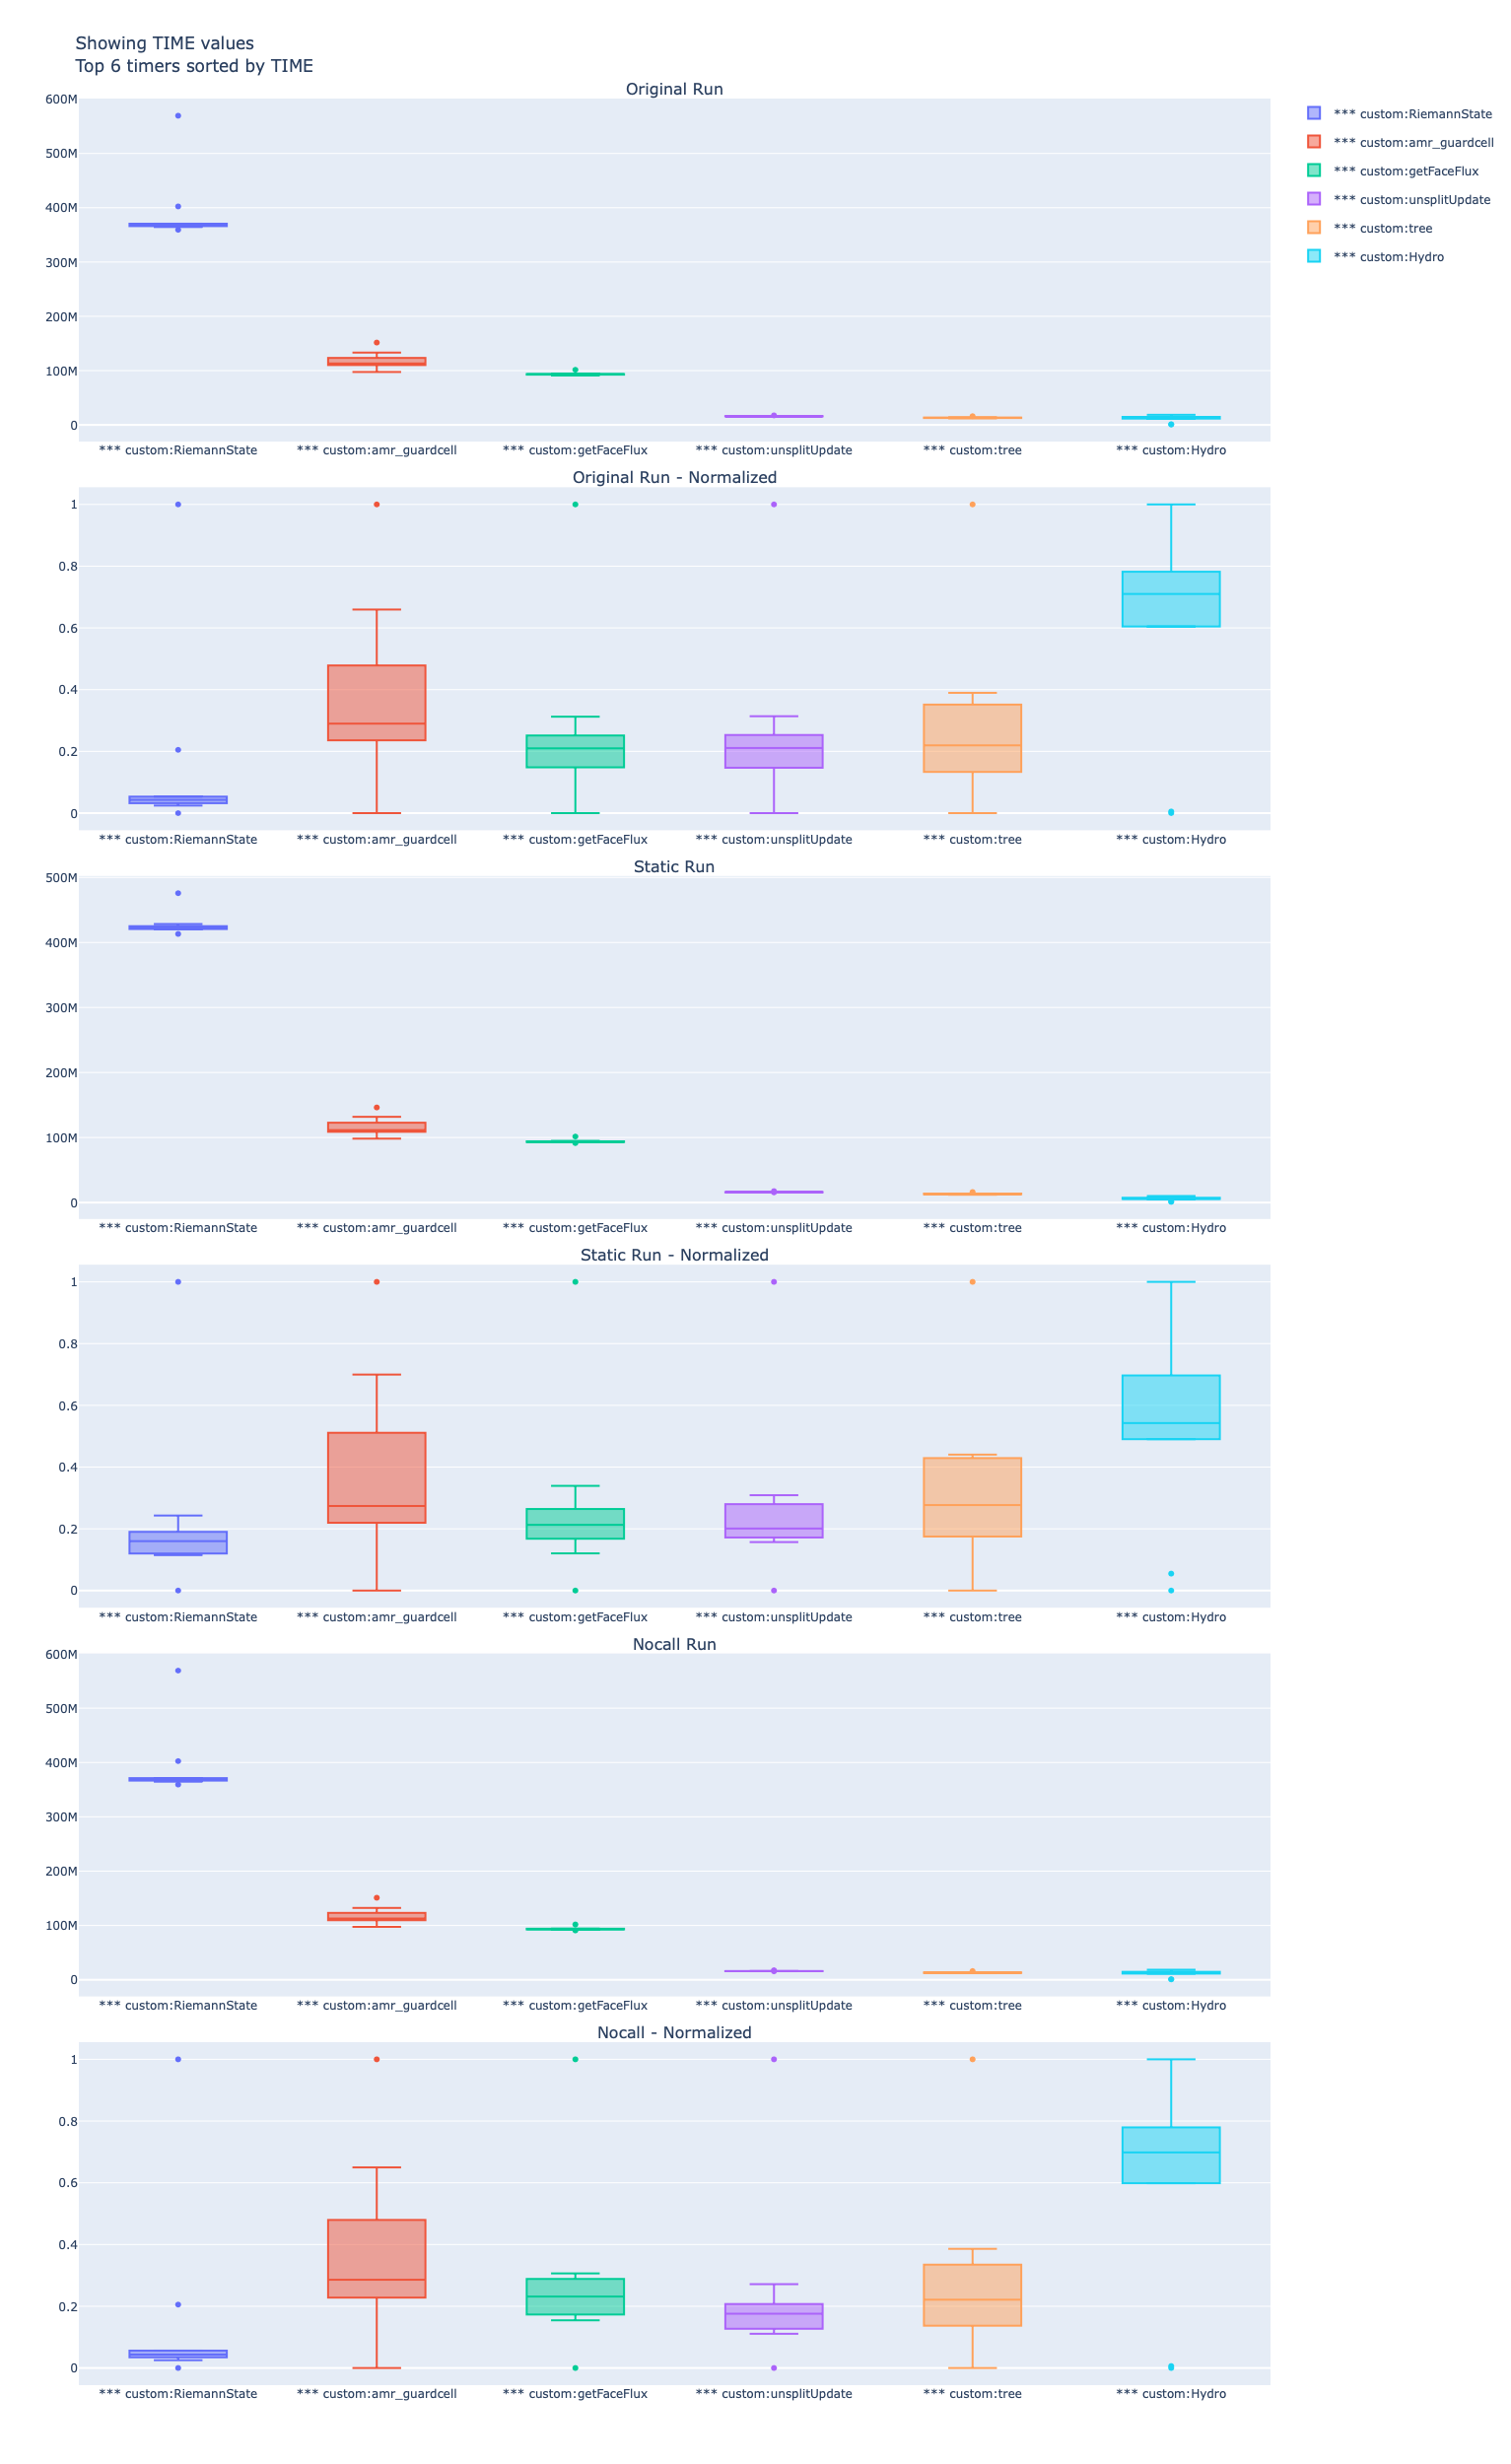

In [11]:
fig = make_subplots(rows=6, cols=1,shared_xaxes=False,
                    vertical_spacing=0.02, subplot_titles=("Original Run", "Original Run - Normalized",
                                                    "Static Run", "Static Run - Normalized",
                                                    'Nocall Run','Nocall - Normalized'))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3','#16E489','#BA764E']
for name, color in zip(top_timers[:6],colors[:6]):
    fig.add_trace(go.Box(y=orig_time[name], name=name, marker_color=color, legendgroup=name), row=1, col=1)
    fig.add_trace(go.Box(y=orig_time_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=2, col=1)
    fig.add_trace(go.Box(y=nc_static_time[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=3, col=1)
    fig.add_trace(go.Box(y=nc_static_time_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=4, col=1)
    fig.add_trace(go.Box(y=nocall_time[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=5, col=1)
    fig.add_trace(go.Box(y=nocall_time_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=6, col=1)

# fig.update_layout(yaxis_title='TIME', title='Top 8 Timers on Original Run sorted by Exclusive TIME')

# fig.show()

fig.update_layout(height=2500, title='Showing TIME values <br> Top 6 timers sorted by TIME')
    
# fig.write_html("/home/users/MTrappett/Flash5_theta/BoxPlotCombine_TIME_Theta64.html")
fig.show()

#### Papi Metrics Box Plots
##### total Ins

In [12]:
orig_ins = pd.DataFrame()
nc_static_ins = pd.DataFrame()
nocall_ins = pd.DataFrame()
for node in range(nodes_num):
    orig_ins = orig_ins.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T)
    nc_static_ins = nc_static_ins.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T)
    nocall_ins = nocall_ins.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_TOT_INS')].T) 

# reset index to make it not a multi-index
orig_ins.reset_index(drop=True, inplace=True)
nc_static_ins.reset_index(drop=True, inplace=True)
nocall_ins.reset_index(drop=True, inplace=True)

# normalize: top_diff = ((top_diff - top_diff.min())/(top_diff.max() - top_diff.min()))

orig_ins_norm = ((orig_ins - orig_ins.min())/(orig_ins.max() - orig_ins.min()))
orig_ins_norm['Node'] = orig_ins_norm.index
orig_ins_norm['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins_norm = ((nc_static_ins - nc_static_ins.min())/(nc_static_ins.max() - nc_static_ins.min()))
nc_static_ins_norm['Node'] = nc_static_ins_norm.index
nc_static_ins_norm['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins_norm = ((nocall_ins - nocall_ins.min())/(nocall_ins.max() - nocall_ins.min()))
nocall_ins_norm['Node'] = nocall_ins_norm.index
nocall_ins_norm['Method'] = ['NoCall' for i in range(nodes_num)]

# add in the node and type columns
orig_ins['Node'] = orig_ins.index
orig_ins['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins['Node'] = nc_static_ins.index
nc_static_ins['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins['Node'] = nocall_ins.index
nocall_ins['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_ins_df = pd.concat([orig_ins, nc_static_ins, nocall_ins])

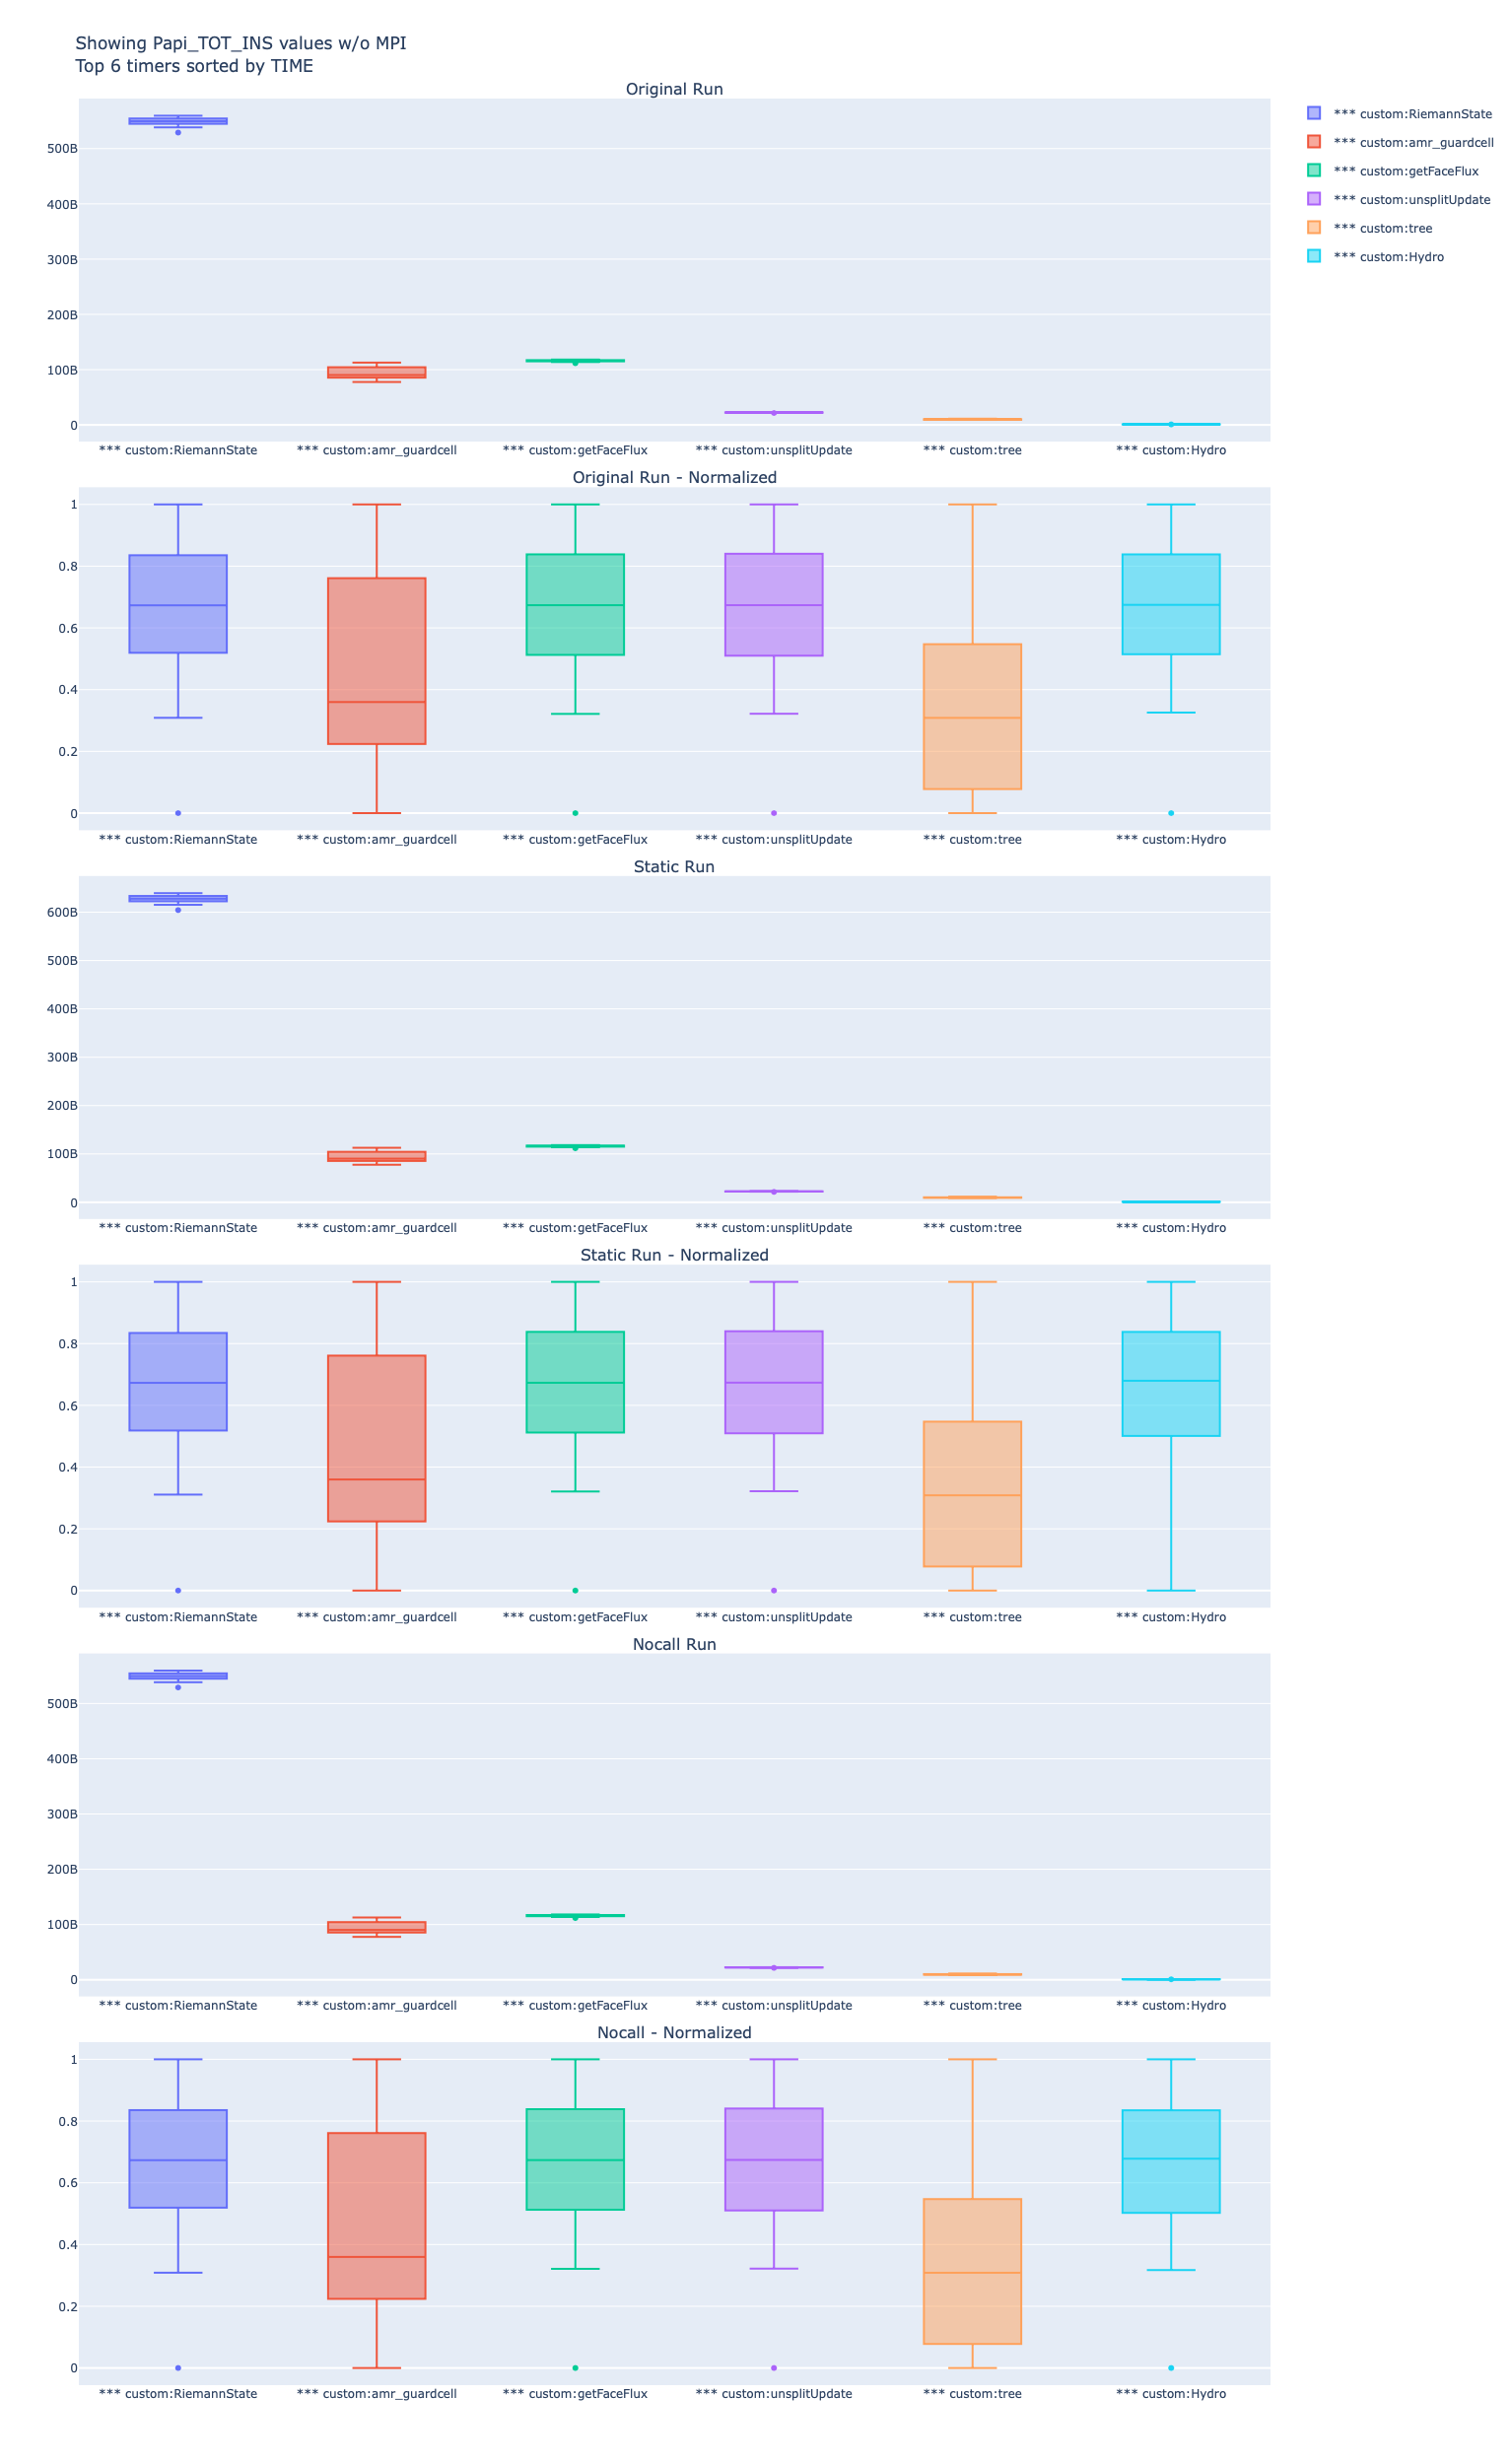

In [13]:
fig = make_subplots(rows=6, cols=1,shared_xaxes=False,
                    vertical_spacing=0.02, subplot_titles=("Original Run", "Original Run - Normalized",
                                                    "Static Run", "Static Run - Normalized",
                                                    'Nocall Run','Nocall - Normalized'))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']
for name, color in zip(top_timers,colors):
    fig.add_trace(go.Box(y=orig_ins[name], name=name, marker_color=color, legendgroup=name), row=1, col=1)
    fig.add_trace(go.Box(y=orig_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=2, col=1)
    fig.add_trace(go.Box(y=nc_static_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=3, col=1)
    fig.add_trace(go.Box(y=nc_static_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=4, col=1)
    fig.add_trace(go.Box(y=nocall_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=5, col=1)
    fig.add_trace(go.Box(y=nocall_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=6, col=1)


fig.update_layout(height=2500, title='Showing Papi_TOT_INS values w/o MPI <br> Top 6 timers sorted by TIME')
    
# fig.write_html("/home/users/MTrappett/Flash5_theta/BoxPlotCombine_PapiTotIns_noMPI_Theta64.html")
fig.show()

##### l1 DCM

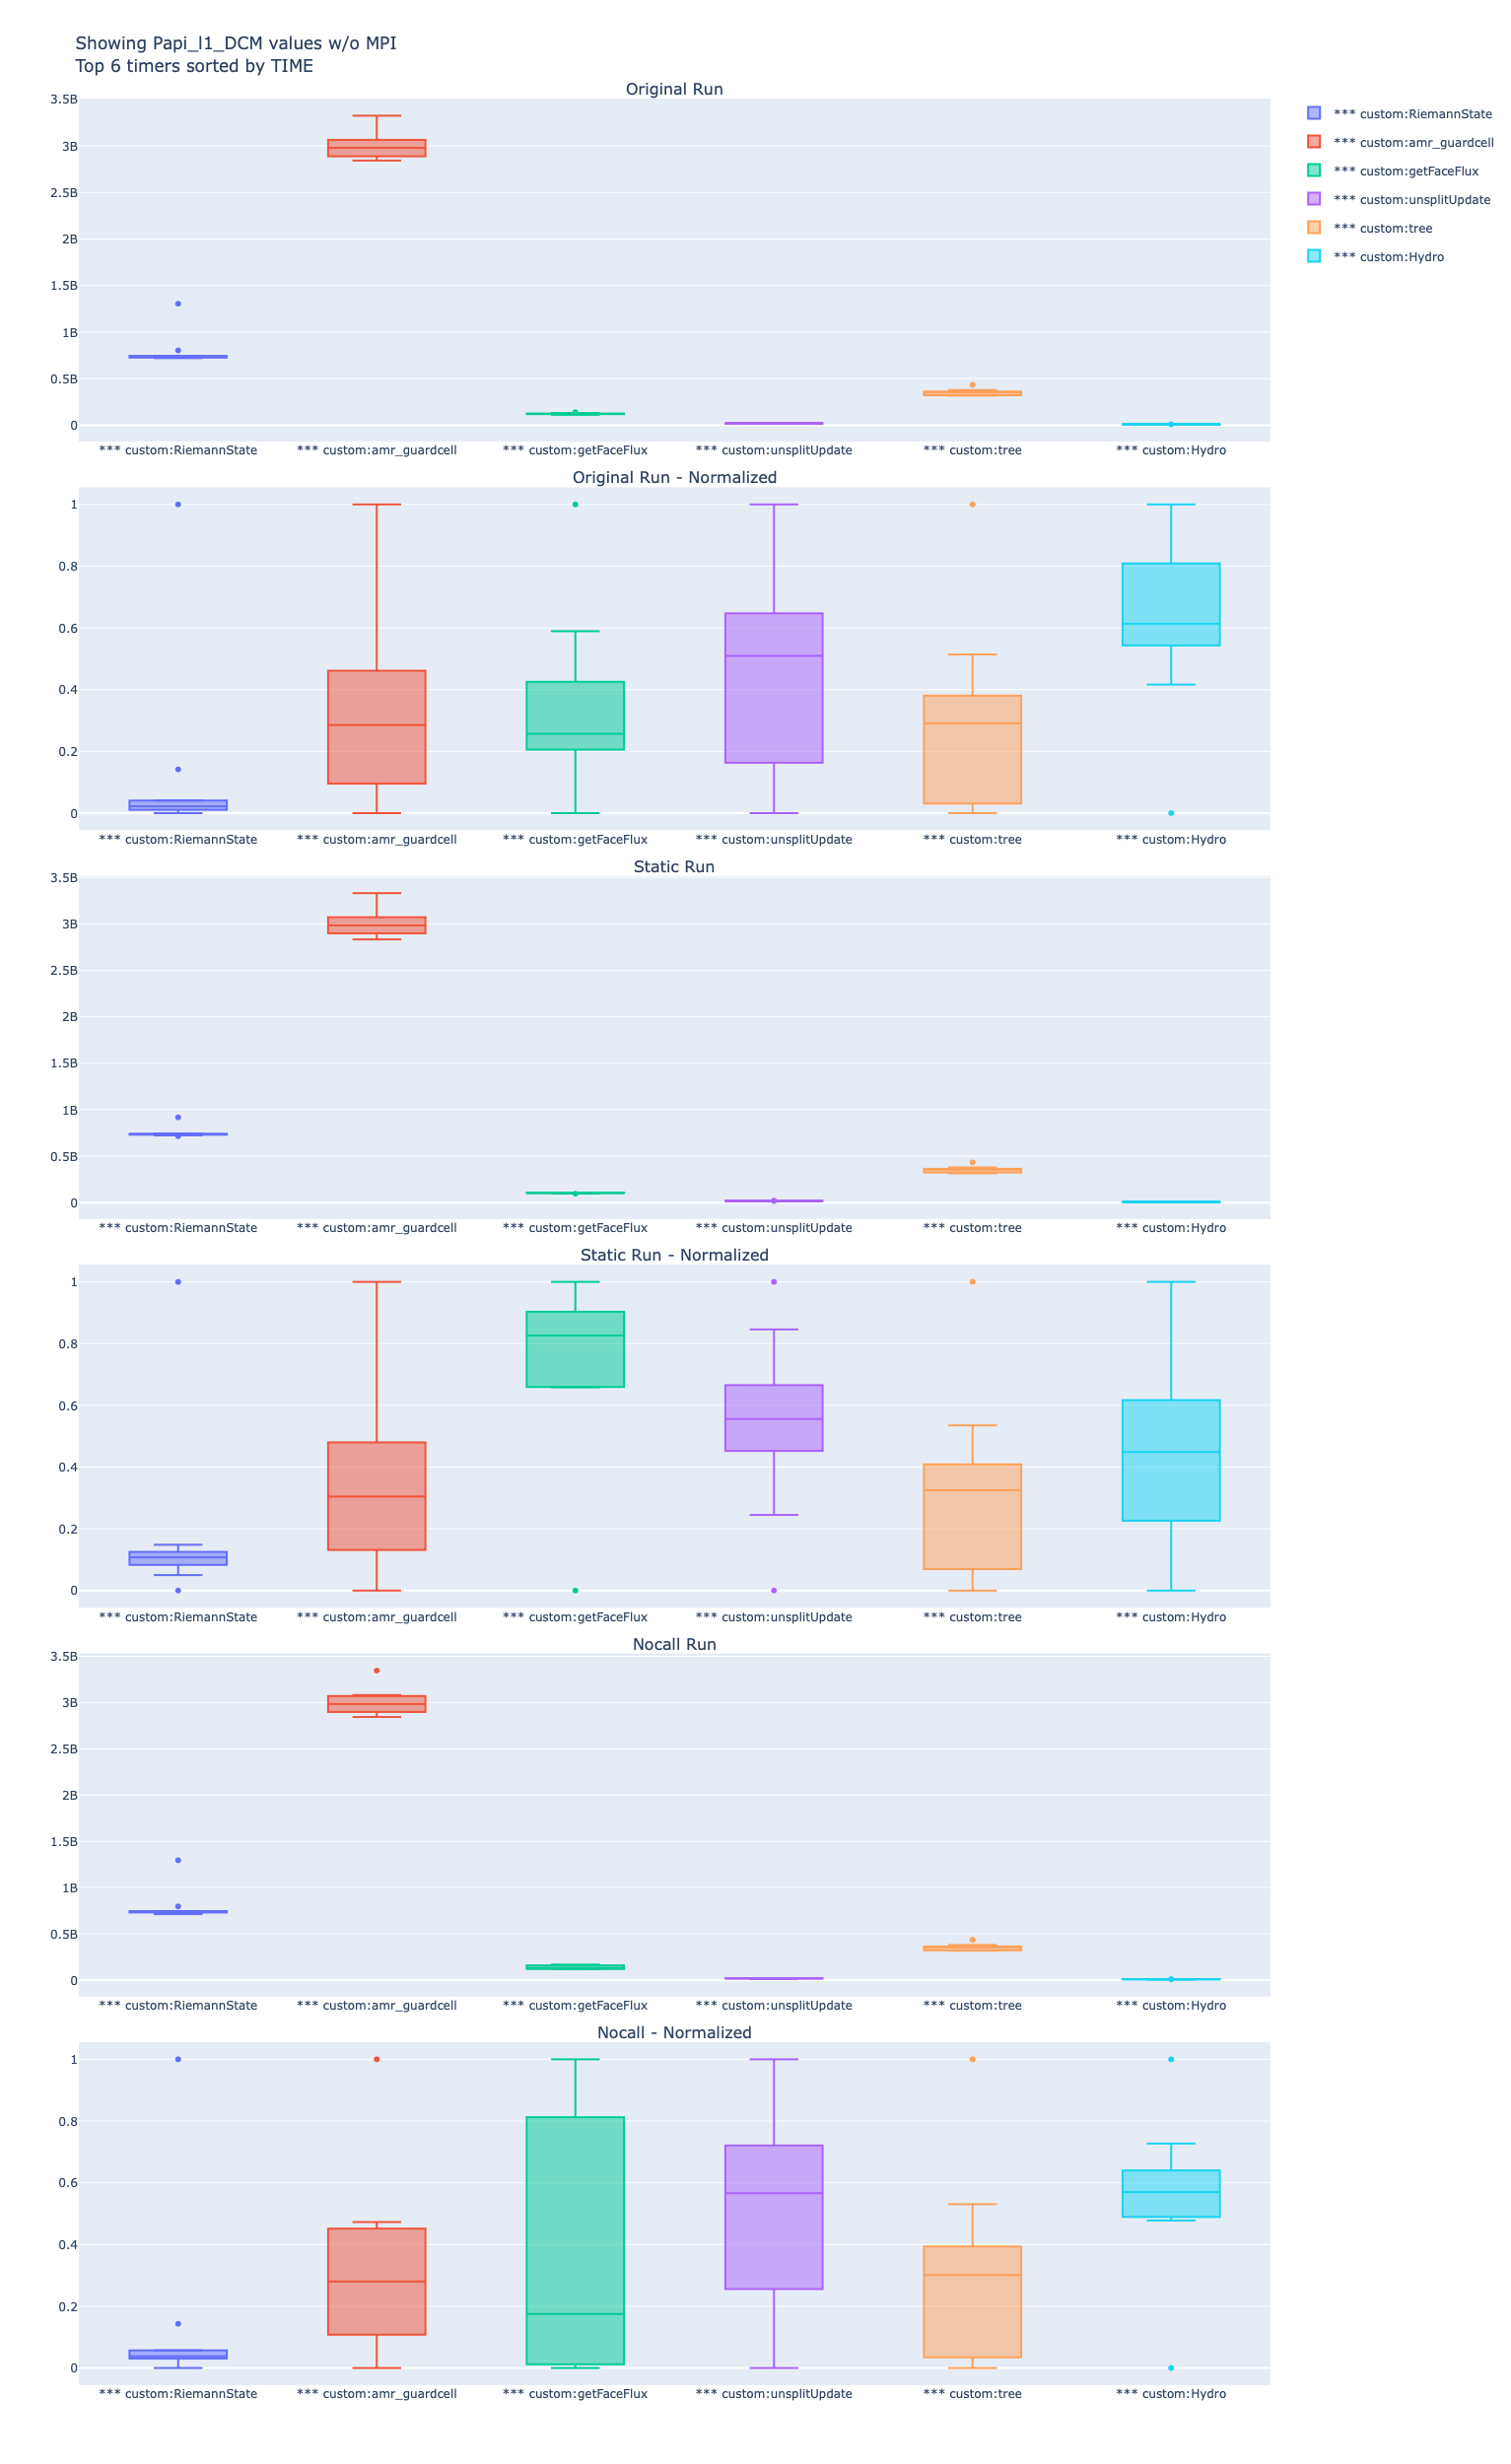

In [14]:
orig_ins = pd.DataFrame()
nc_static_ins = pd.DataFrame()
nocall_ins = pd.DataFrame()
for node in range(nodes_num):
    orig_ins = orig_ins.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T)
    nc_static_ins = nc_static_ins.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T)
    nocall_ins = nocall_ins.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_L1_DCM')].T) 

# reset index to make it not a multi-index
orig_ins.reset_index(drop=True, inplace=True)
nc_static_ins.reset_index(drop=True, inplace=True)
nocall_ins.reset_index(drop=True, inplace=True)

# normalize: top_diff = ((top_diff - top_diff.min())/(top_diff.max() - top_diff.min()))

orig_ins_norm = ((orig_ins - orig_ins.min())/(orig_ins.max() - orig_ins.min()))
orig_ins_norm['Node'] = orig_ins_norm.index
orig_ins_norm['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins_norm = ((nc_static_ins - nc_static_ins.min())/(nc_static_ins.max() - nc_static_ins.min()))
nc_static_ins_norm['Node'] = nc_static_ins_norm.index
nc_static_ins_norm['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins_norm = ((nocall_ins - nocall_ins.min())/(nocall_ins.max() - nocall_ins.min()))
nocall_ins_norm['Node'] = nocall_ins_norm.index
nocall_ins_norm['Method'] = ['NoCall' for i in range(nodes_num)]

# add in the node and type columns
orig_ins['Node'] = orig_ins.index
orig_ins['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins['Node'] = nc_static_ins.index
nc_static_ins['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins['Node'] = nocall_ins.index
nocall_ins['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_ins_df = pd.concat([orig_ins, nc_static_ins, nocall_ins])


fig = make_subplots(rows=6, cols=1,shared_xaxes=False,
                    vertical_spacing=0.02, subplot_titles=("Original Run", "Original Run - Normalized",
                                                    "Static Run", "Static Run - Normalized",
                                                    'Nocall Run','Nocall - Normalized'))

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']
for name, color in zip(top_timers,colors):
    fig.add_trace(go.Box(y=orig_ins[name], name=name, marker_color=color, legendgroup=name), row=1, col=1)
    fig.add_trace(go.Box(y=orig_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=2, col=1)
    fig.add_trace(go.Box(y=nc_static_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=3, col=1)
    fig.add_trace(go.Box(y=nc_static_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=4, col=1)
    fig.add_trace(go.Box(y=nocall_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=5, col=1)
    fig.add_trace(go.Box(y=nocall_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=6, col=1)


fig.update_layout(height=2500, title='Showing Papi_l1_DCM values w/o MPI <br> Top 6 timers sorted by TIME')
    
# fig.write_html("/home/users/MTrappett/Flash5_theta/BoxPlotCombine_Papi_L1_DCM_noMPI_Theta64.html")
fig.show()

##### Papi RES STL

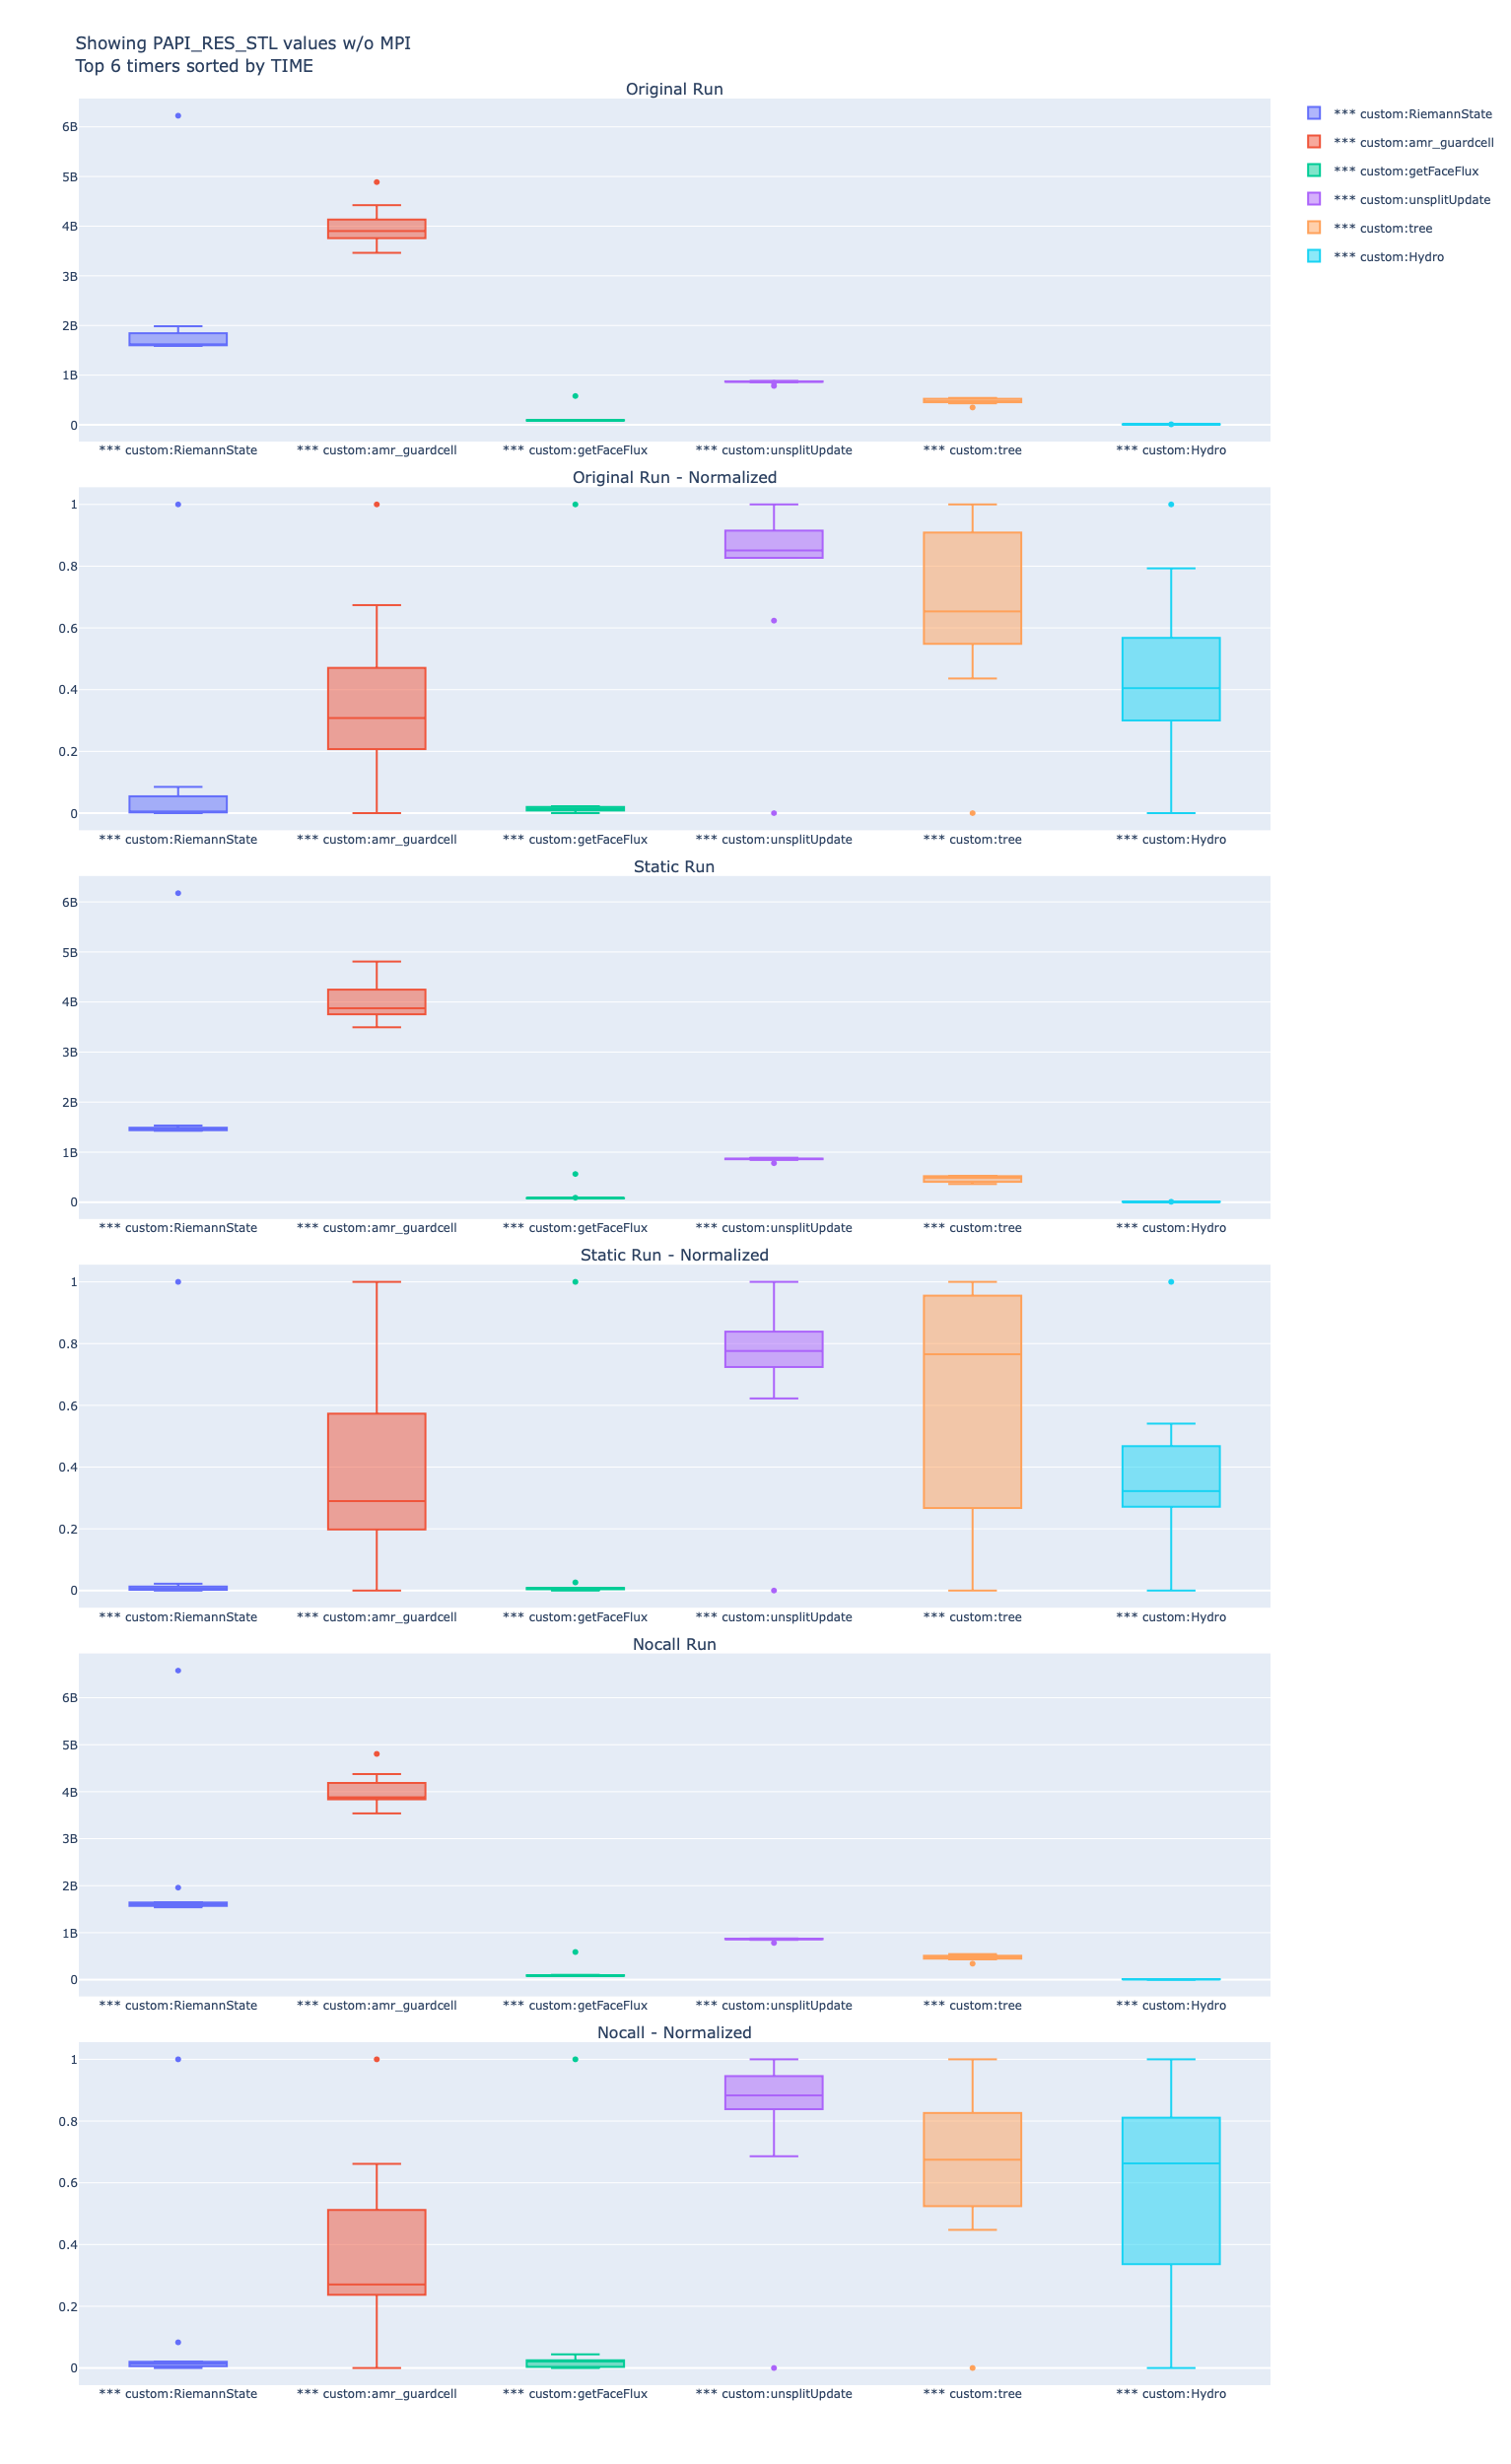

In [15]:
orig_ins = pd.DataFrame()
nc_static_ins = pd.DataFrame()
nocall_ins = pd.DataFrame()
for node in range(nodes_num):
    orig_ins = orig_ins.append(orig_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T)
    nc_static_ins = nc_static_ins.append(nc_static_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T)
    nocall_ins = nocall_ins.append(nocall_df.loc[(node,0,0),('Exclusive','PAPI_RES_STL')].T) 

# reset index to make it not a multi-index
orig_ins.reset_index(drop=True, inplace=True)
nc_static_ins.reset_index(drop=True, inplace=True)
nocall_ins.reset_index(drop=True, inplace=True)

# normalize: top_diff = ((top_diff - top_diff.min())/(top_diff.max() - top_diff.min()))

orig_ins_norm = ((orig_ins - orig_ins.min())/(orig_ins.max() - orig_ins.min()))
orig_ins_norm['Node'] = orig_ins_norm.index
orig_ins_norm['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins_norm = ((nc_static_ins - nc_static_ins.min())/(nc_static_ins.max() - nc_static_ins.min()))
nc_static_ins_norm['Node'] = nc_static_ins_norm.index
nc_static_ins_norm['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins_norm = ((nocall_ins - nocall_ins.min())/(nocall_ins.max() - nocall_ins.min()))
nocall_ins_norm['Node'] = nocall_ins_norm.index
nocall_ins_norm['Method'] = ['NoCall' for i in range(nodes_num)]

# add in the node and type columns
orig_ins['Node'] = orig_ins.index
orig_ins['Method'] = ['Orig' for i in range(nodes_num)]

nc_static_ins['Node'] = nc_static_ins.index
nc_static_ins['Method'] = ['Static' for i in range(nodes_num)]

nocall_ins['Node'] = nocall_ins.index
nocall_ins['Method'] = ['NoCall' for i in range(nodes_num)]

non_normal_ins_df = pd.concat([orig_ins, nc_static_ins, nocall_ins])


fig = make_subplots(rows=6, cols=1,shared_xaxes=False,
                    vertical_spacing=0.02, subplot_titles=("Original Run", "Original Run - Normalized",
                                                    "Static Run", "Static Run - Normalized",
                                                    'Nocall Run','Nocall - Normalized'))

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']
for name, color in zip(top_timers,colors):
    fig.add_trace(go.Box(y=orig_ins[name], name=name, marker_color=color, legendgroup=name), row=1, col=1)
    fig.add_trace(go.Box(y=orig_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=2, col=1)
    fig.add_trace(go.Box(y=nc_static_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=3, col=1)
    fig.add_trace(go.Box(y=nc_static_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=4, col=1)
    fig.add_trace(go.Box(y=nocall_ins[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=5, col=1)
    fig.add_trace(go.Box(y=nocall_ins_norm[name], name=name, marker_color=color, legendgroup=name, showlegend=False), row=6, col=1)

# fig.update_layout(yaxis_title='TIME', title='Top 8 Timers on Original Run sorted by Exclusive TIME')

# fig.show()

fig.update_layout(height=2500, title='Showing PAPI_RES_STL values w/o MPI <br> Top 6 timers sorted by TIME')
    
# fig.write_html("/home/users/MTrappett/Flash5_theta/BoxPlotCombine_PAPI_RES_STL_noMPI_Theta64.html")
fig.show()